In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder


In [2]:
sample_data = pd.read_csv("student-mat.csv")

In [3]:
sample_data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [4]:
""" Проверяю NaN записи"""
for col in sample_data.columns:
    print(col, len(sample_data.loc[sample_data[col].isnull()])) 

school 0
sex 0
age 0
address 0
famsize 0
Pstatus 0
Medu 0
Fedu 0
Mjob 0
Fjob 0
reason 0
guardian 0
traveltime 0
studytime 0
failures 0
schoolsup 0
famsup 0
paid 0
activities 0
nursery 0
higher 0
internet 0
romantic 0
famrel 0
freetime 0
goout 0
Dalc 0
Walc 0
health 0
absences 0
G1 0
G2 0
G3 0


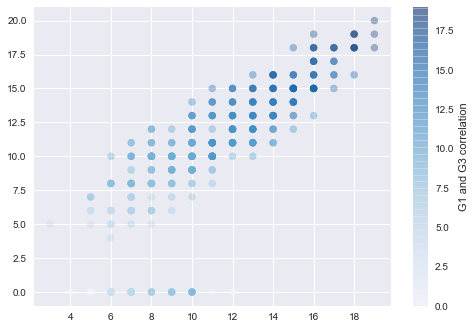

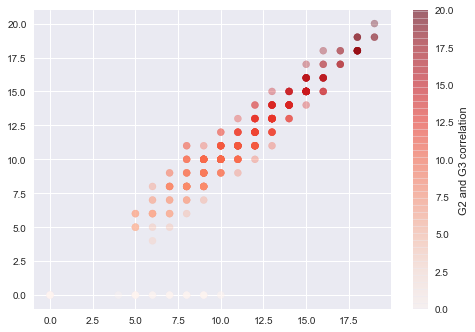

In [5]:
""" Первым делом хотелось проверить зависимость между предварительными
экзаменами(G1, G2) и итоговым(G3). Как видно из графиков, между этими
величинами существует четкая связь. Однако, автор соревнования просит
не использовать данные параметры, так как модель предсказывающая за-
ранее(предварительных экзаменов) итоговую оценку будет цениться гораздно больше.
"""

plt.style.use("seaborn")
plt.scatter(sample_data.G1, sample_data.G3, marker="o", s=50, alpha=0.35, c=sample_data.G2, cmap="Blues")
cbar = plt.colorbar()
cbar.set_label("G1 and G3 correlation")
plt.show()

plt.scatter(sample_data.G2, sample_data.G3, marker="o", s=50, alpha=0.35, c=sample_data.G3, cmap="Reds")
cbar = plt.colorbar()
cbar.set_label("G2 and G3 correlation")
plt.show()

In [6]:
""" Вторая проблема - не все данные int и не все уникальные значения
в колонках состоят из 2 значений. Колонки с 2 уникальными значениями переведу 
в колонки со значением 1 или два, а над 4 колонками с различными значениями 
использую one-hot encoding"""
print(sample_data.dtypes, "\n") 

s = (sample_data.dtypes == "object")
object_cols = list(s[s].index)

listOfUniques = [list(sample_data[col].unique()) for col in sample_data.columns if sample_data[col].dtype == "object"]

print("Categorical variables:")
print(object_cols, "\n")
for ಠ_ಠ in listOfUniques:
    print(ಠ_ಠ)

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object 

Categorical variables:
['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'] 

['GP', 'MS']
['F', 'M']
['U', 'R']
['GT3', 'LE3']
['A', 'T']
['at_home', 'health', 'oth

In [7]:
frCopy = sample_data.copy()  # Не хочу менять начальные данные

In [8]:
from sklearn.preprocessing import OneHotEncoder

""" Сначало one-hot encoding столбцов с более чем 2 значениями"""
listWithMultiUniques = ["Mjob", "Fjob", "reason", "guardian"]

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(frCopy[listWithMultiUniques])).astype("int64")

OH_cols.index = frCopy.index

num_X = frCopy.drop(listWithMultiUniques, axis=1)

pochtiNumFrCopy = pd.concat([num_X, OH_cols], axis=1)
print(pochtiNumFrCopy.columns)
pochtiNumFrCopy.head()


Index([    'school',        'sex',        'age',    'address',    'famsize',
          'Pstatus',       'Medu',       'Fedu', 'traveltime',  'studytime',
         'failures',  'schoolsup',     'famsup',       'paid', 'activities',
          'nursery',     'higher',   'internet',   'romantic',     'famrel',
         'freetime',      'goout',       'Dalc',       'Walc',     'health',
         'absences',         'G1',         'G2',         'G3',            0,
                  1,            2,            3,            4,            5,
                  6,            7,            8,            9,           10,
                 11,           12,           13,           14,           15,
                 16],
      dtype='object')


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,7,8,9,10,11,12,13,14,15,16
0,GP,F,18,U,GT3,A,4,4,2,2,...,0,0,1,1,0,0,0,0,1,0
1,GP,F,17,U,GT3,T,1,1,1,2,...,1,0,0,1,0,0,0,1,0,0
2,GP,F,15,U,LE3,T,1,1,1,2,...,1,0,0,0,0,1,0,0,1,0
3,GP,F,15,U,GT3,T,4,2,1,3,...,0,1,0,0,1,0,0,0,1,0
4,GP,F,16,U,GT3,T,3,3,1,2,...,1,0,0,0,1,0,0,1,0,0


In [9]:
""" Теперь меняю оставшиеся категориальные столбцы на 1 или 0"""

s = (pochtiNumFrCopy.dtypes == "object")
object_cols = list(s[s].index)

listOfUniques = [list(pochtiNumFrCopy[col].unique()) for col in pochtiNumFrCopy.columns if pochtiNumFrCopy[col].dtype == "object"]

for ind, col in enumerate(listOfUniques):
    pochtiNumFrCopy[object_cols[ind]] = pochtiNumFrCopy[object_cols[ind]].map(lambda v: listOfUniques[ind].index(v))
NumFrCopy = pochtiNumFrCopy.copy()
NumFrCopy

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,7,8,9,10,11,12,13,14,15,16
0,0,0,18,0,0,0,4,4,2,2,...,0,0,1,1,0,0,0,0,1,0
1,0,0,17,0,0,1,1,1,1,2,...,1,0,0,1,0,0,0,1,0,0
2,0,0,15,0,1,1,1,1,1,2,...,1,0,0,0,0,1,0,0,1,0
3,0,0,15,0,0,1,4,2,1,3,...,0,1,0,0,1,0,0,0,1,0
4,0,0,16,0,0,1,3,3,1,2,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,0,1,0,2,2,1,2,...,0,1,0,1,0,0,0,0,0,1
391,1,1,17,0,1,1,3,1,2,1,...,0,1,0,1,0,0,0,0,1,0
392,1,1,21,1,0,1,1,1,1,1,...,1,0,0,1,0,0,0,0,0,1
393,1,1,18,1,1,1,3,2,3,1,...,1,0,0,1,0,0,0,0,1,0


In [10]:
"""Проверяем, что тип данных в столбцах изменился"""
print(NumFrCopy.dtypes, "\n") 

school        int64
sex           int64
age           int64
address       int64
famsize       int64
Pstatus       int64
Medu          int64
Fedu          int64
traveltime    int64
studytime     int64
failures      int64
schoolsup     int64
famsup        int64
paid          int64
activities    int64
nursery       int64
higher        int64
internet      int64
romantic      int64
famrel        int64
freetime      int64
goout         int64
Dalc          int64
Walc          int64
health        int64
absences      int64
G1            int64
G2            int64
G3            int64
0             int64
1             int64
2             int64
3             int64
4             int64
5             int64
6             int64
7             int64
8             int64
9             int64
10            int64
11            int64
12            int64
13            int64
14            int64
15            int64
16            int64
dtype: object 



In [11]:
"""Анализируем зависимости"""
corr_matrix = NumFrCopy.corr()
corr_matrix["G3"].sort_values(ascending=False)

G3            1.000000
G2            0.904868
G1            0.801468
Medu          0.217147
Fedu          0.152457
1             0.116158
sex           0.103456
paid          0.101996
internet      0.098483
studytime     0.097820
13            0.095692
9             0.095374
schoolsup     0.082788
famsize       0.081407
3             0.078429
4             0.057712
6             0.057111
12            0.052008
famrel        0.051363
absences      0.034247
14            0.032493
15            0.022338
activities    0.016100
freetime      0.011307
5            -0.013385
8            -0.016108
11           -0.021359
famsup       -0.039157
school       -0.045017
nursery      -0.051568
Walc         -0.051939
7            -0.053483
Dalc         -0.054660
Pstatus      -0.058009
health       -0.061335
16           -0.087774
2            -0.096477
10           -0.098950
address      -0.105756
0            -0.115634
traveltime   -0.117142
romantic     -0.129970
goout        -0.132791
age        

In [12]:
NumFrCopy["G3"]

0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64

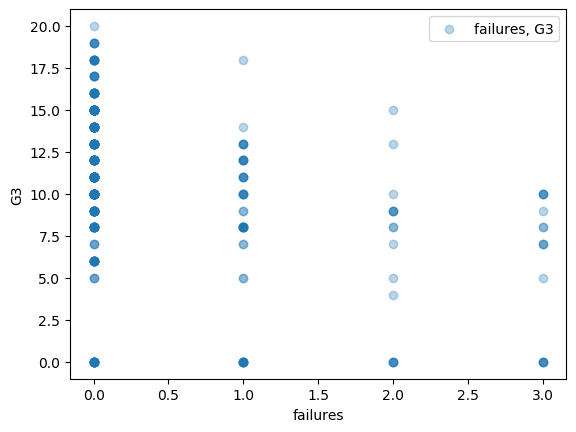

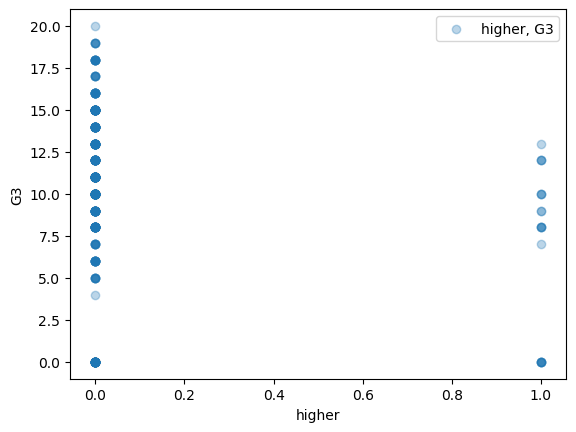

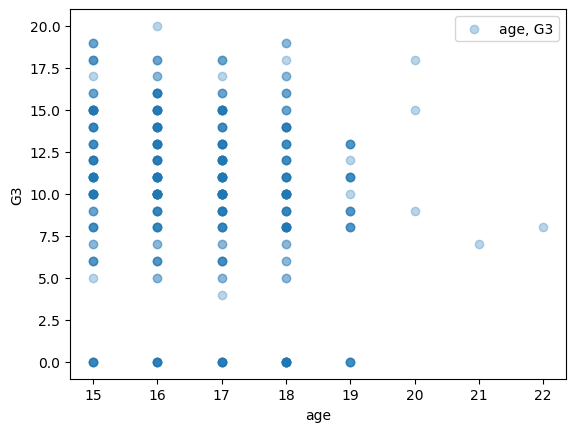

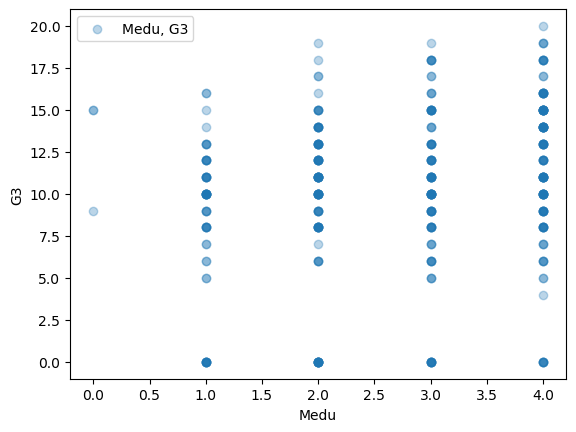

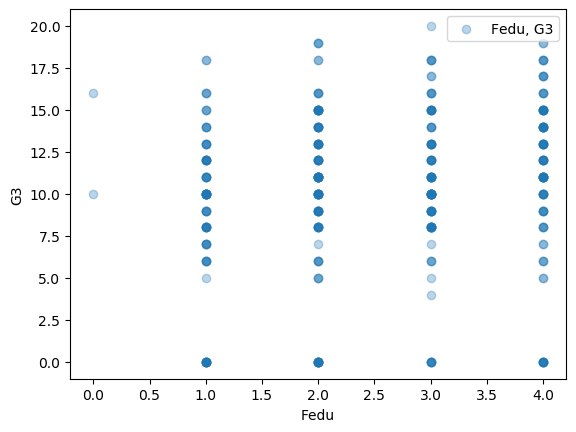

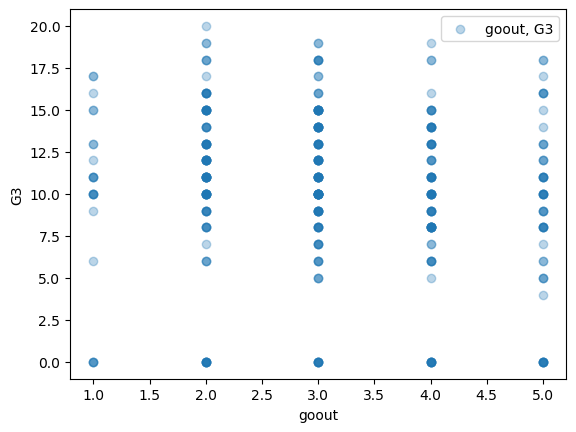

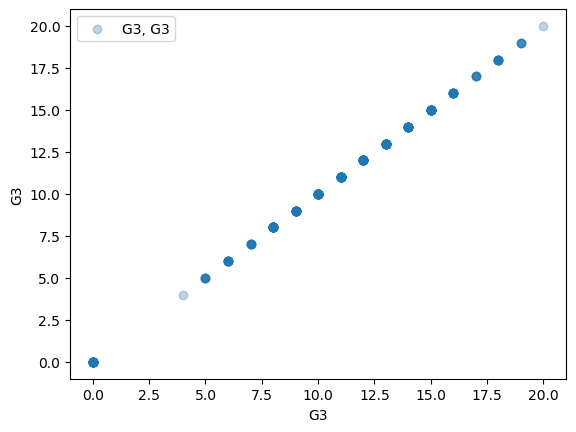

In [16]:
""" На основании полученных данных, я решил такие характеристики:failures,
higher, age, Medu, Fedu, goout, absences. Далее изобразим эти зависимости."""
interestingX = ["failures", "higher", "age", "Medu", "Fedu", "goout", "G3"]
plt.style.use("default")
for ax in interestingX:
    plt.scatter(NumFrCopy[ax], NumFrCopy.G3, label=ax + ", G3", alpha=0.3)
    plt.ylabel("G3")
    plt.xlabel(ax)
    plt.legend()
    plt.show()

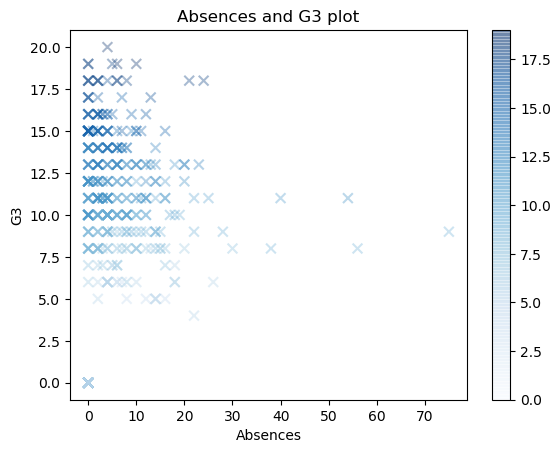

In [14]:
""" Насчет последнего столбца. Для меня стало неожиданностью, что столбец absences слабо коррелирует с G3
(согласно методу corr()). Лично мне показалось, что по графику видна некоторая зависимость. Поэтому, для 
получения практического опыта, я решил ее добавить(усвоить урок - кому следует доверять больше)."""
plt.scatter(sample_data.absences , sample_data.G3, marker="x", s=50, alpha=0.35, c=sample_data.G2, cmap="Blues")
cbar = plt.colorbar()
plt.ylabel("G3")
plt.xlabel("Absences")
plt.title("Absences and G3 plot")
plt.show()

In [15]:
NumFrCopy[interestingX].to_csv("final_data.csv")